In [75]:
'''
@ChiZuo July, 31, 2019
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [76]:
path = 'wine-quality/winequality-white.csv'
features = ['fixed acidity', 'volatile acidity', 'citric acid',
           'residual sugar', 'chlorides', 'free sulfur dioxide',
           'total sulfur dioxide', 'density', 'pH', 'sulphates',
           'alcohol', 'quality']
data = pd.read_csv(path, header=None, names=features, sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [77]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


### data.describe() could have a overview of the data

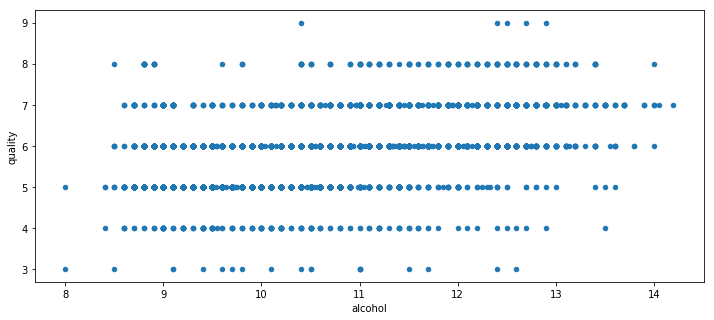

In [78]:
data.plot(kind='scatter', x=features[-2], y=features[-1], figsize=(12, 5))
plt.show()
# print(data[features[0]])

### It seems like to be linear through the scatter plot

### Create the cost function first
$$ J\left( \theta \right) = \frac{1}{2m} \sum \limits_{i=1}^{m} \left(h_{\theta}\left(x^{i}\right) - y^{i} \right)^{2}$$

### And the hypothesis function is
$$ h_{\theta}\left(x\right) = \theta_{0} + \theta_{1}{x}_{1}$$

In [79]:
def compute_cost(X, y, theta):
    inner = np.power((X * theta.T -y), 2)
    return np.sum(inner) / 2 / len(X)

### Define the compute_cost function to compute 
$$ \left( h_{\theta}\left(x^i \right) - y^i\right)^2 $$

In [80]:
data.insert(0, 'Ones', 1)
data.head()

,Ones,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [81]:
print(data.shape)

(4898, 13)


In [82]:
cols = data.shape[1]
rows = data.shape[0]

In [83]:
X = data.iloc[:, 0:cols-1] #get rid of the last column
y = data.iloc[:, cols-1:cols] #get the last column
y.head()

,quality
0,6
1,6
2,6
3,6
4,6


In [84]:
X.head()

,Ones,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [85]:
X = np.matrix(X.values)
y = np.matrix(y.values)
temp = np.array([0 for _ in range(12)])
temp = temp.reshape((1, 12))
theta = np.matrix(temp)
X.shape, y.shape, theta.shape, temp.shape

((4898, 12), (4898, 1), (1, 12), (1, 12))

In [86]:
compute_cost(X, y, theta)

17.66700694160882

In [87]:
def batchGradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
#         print('hhhhh', error.shape)
        for j in range(parameters):
#             xxxx = X[:, j]
#             print('xxxx', xxxx.shape)
            term = np.multiply(error, X[:, j])
            temp[0, j] = theta[0, j] - ((alpha / len(X)) * np.sum(term))
        theta = temp
        cost[i] = compute_cost(X, y, theta)
    
    return theta, cost

### init some parameters

In [88]:
alpha = 0.001
iters = 1000

### the result is overflow, so we need normalize it

In [89]:
ans, cost = batchGradientDescent(X, y, theta, alpha, iters)

C:\Users\Raibows\Anaconda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
C:\Users\Raibows\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in power
  
C:\Users\Raibows\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in multiply
  if sys.path[0] == '':
C:\Users\Raibows\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


In [90]:
def normalize(X, y):
    X_shape = X.shape
    for j in range(1, X_shape[1]):
        _mean = np.mean(X[:, j])
        _max = np.max(X[:, j])
        _min = np.min(X[:, j])
#         print('hhhh', X[:, j])
#         print(_mean, _max, _min)
        X[:, j] -= _mean
        X[:, j] /= (_max - _min)
#         print('jjjj', X[:, j])
    _mean = np.mean(y)
    _max = np.max(y)
    _min = np.min(y)
    y = y.astype('float64')
    y[0, :] -= _mean
    y[0, :] /= (_max - _min)

In [91]:
iters = 1000
normalize(X, y) #normaliziation
# print(X)
ans, cost = batchGradientDescent(X, y, theta, alpha, iters)
print(ans, cost[-1])

[[ 3.71662898e+00 -8.02119924e-03 -1.69900992e-02 -5.29966484e-04
  -6.36553512e-03 -1.18246513e-02  5.72226296e-04 -1.48079815e-02
  -1.52696138e-02  1.17996732e-02  6.26539569e-03  7.48704017e-02]] 2.720892742712494
